In [1]:
import os
os.chdir('/home/conaire')
#os.environ["XLA_FLAGS"]= '--xla_gpu_cuda_data_dir=/miniconda3/envs/Toliman-GPU/lib/python3.10/site-packages/'
#os.environ["XLA_FLAGS"]='--xla_gpu_strict_conv_algorithm_picker=false'

import jax
import jaxlib
import jax.numpy as np
import jax.lax as jl
import jax.random as jr
from jax.config import config
#config.update("jax_enable_x64", True)

import toliman
import toliman.constants as const
import toliman.math as math
import matplotlib as mpl
import matplotlib.pyplot as plt
import tqdm.notebook as tqdm
import dLux
import optax
import equinox
#TF_CPP_MIN_LOG_LEVEL=0

jax.default_backend()

2023-03-27 01:10:07.339602: W external/org_tensorflow/tensorflow/compiler/xla/service/platform_util.cc:198] unable to create StreamExecutor for CUDA:0: failed initializing StreamExecutor for CUDA device ordinal 0: INTERNAL: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_OUT_OF_MEMORY: out of memory; total memory reported: 6223888384
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/home/conaire/miniconda3/envs/Toliman-GPU/lib/python3.10/site-packages/toliman/constants.py:137: UserWarning: `TOLIMAN_HOME` is not defined. Using `.assets`.
  warnings.warn("`TOLIMAN_HOME` is not defined. Using `.assets`.")
/home/conaire/miniconda3/envs/Toliman-GPU/lib/python3.10/site-packages/toliman/__init__.py:13: UserWarning: Using existing assets.
  warnings.warn("Using existing {}.".format(path))


dLux: Jax is running in 32-bit, to enable 64-bit visit:
https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html#double-64bit-precision


'cpu'

In [2]:
mask = np.load('miniconda3/envs/Toliman-GPU/lib/python3.10/site-packages/toliman/assets/mask.npy')
maskSidelobes = np.load('miniconda3/envs/Toliman-GPU/lib/python3.10/site-packages/toliman/assets/TolimanMask_sidelobes.npy')

(1024, 1024)


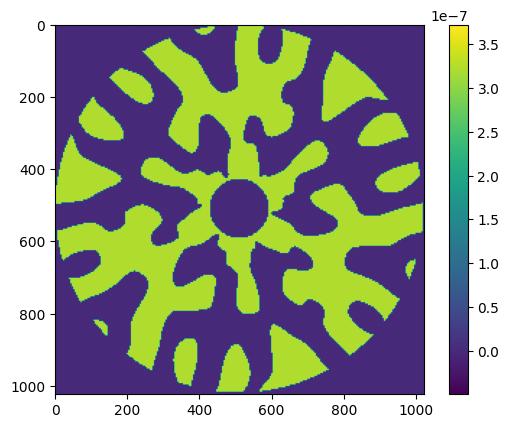

In [3]:
plt.imshow(mask)
plt.colorbar()
print(np.shape(mask))

(1024, 1024)


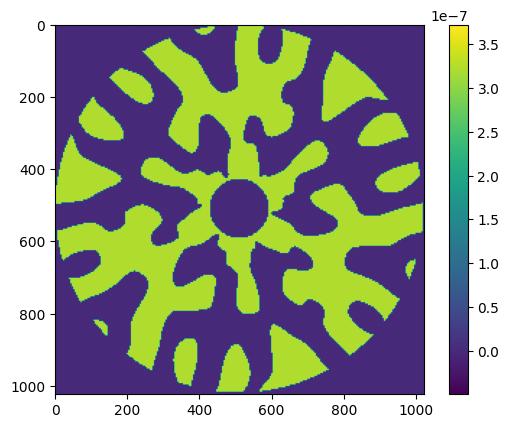

In [4]:
plt.imshow(maskSidelobes)
plt.colorbar()
print(np.shape(maskSidelobes))

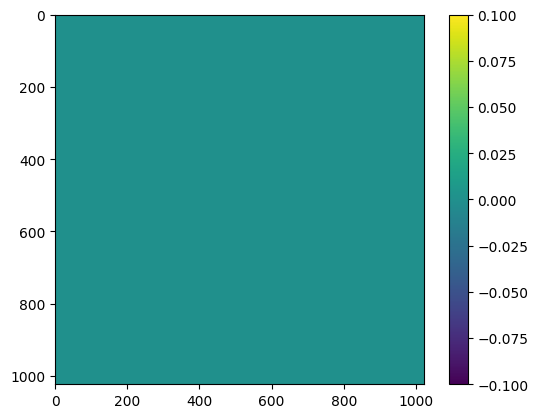

In [5]:
plt.imshow(mask-maskSidelobes)
plt.colorbar()

In [16]:
model: object = dLux.Instrument(
    optics = toliman.TolimanOptics(pixels_on_detector = 1024, pixels_in_pupil = 1024, grating_amplitude = None),
    detector = toliman.TolimanDetector(simulate_pixel_response = False),
    sources = [toliman.AlphaCentauri()]
)

In [17]:
testsd = np.load('test-mask-ignore.npy')

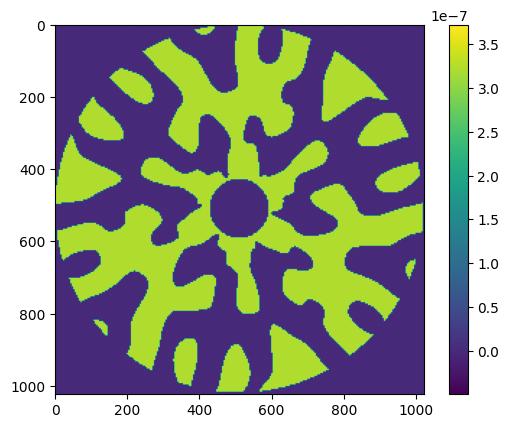

In [18]:
plt.imshow(testsd)
plt.colorbar()

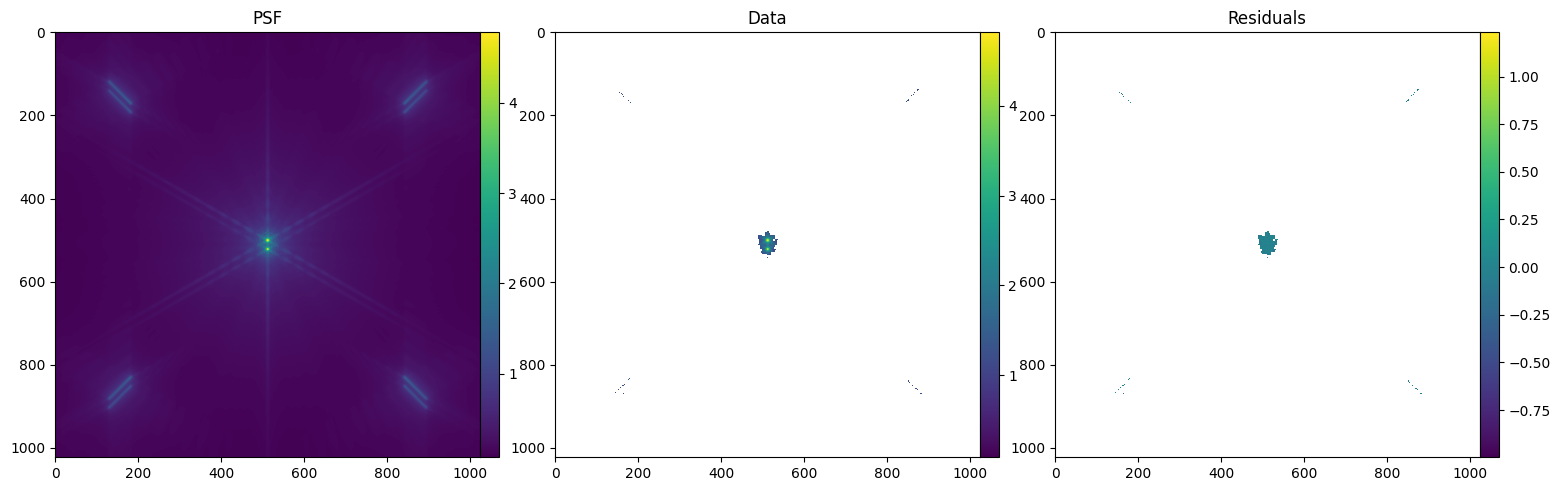

In [9]:
psf: float = model.model()
data: float = math.simulate_data(psf, 1)

def im_and_cbar(figure: object, image: float, pos: int, title: str, naxes: int) -> object:
    cbar_pad: float = 0.05
    cbar_width: float = 0.0125
    width: float = 1.0 / naxes - cbar_pad
    disp: float = cbar_pad / 2.0 * naxes
    height: float = 1.0 - 2.0 * disp
    corner: float = float(pos) / float(naxes)
    im_ax: object = figure.add_axes([corner, disp, width, height])
    cbar_ax: object = figure.add_axes([corner + width, disp, cbar_width, height])
    im_cmap: object = im_ax.imshow(image)
    im_cbar: object = figure.colorbar(im_cmap, cax = cbar_ax)
    #im_xticks: object = im_ax.axis("off")
    im_title: object = im_ax.set_title(title) 
    return figure

scale: float = 5.0
naxes: int = 3
figure: object = plt.figure(figsize = (naxes * scale, scale))
figure: object = im_and_cbar(figure, psf**0.2, 1, "PSF", 3)
figure: object = im_and_cbar(figure, data**0.2, 2, "Data", 3)
figure: object = im_and_cbar(figure, data**0.2 - psf**0.2, 3, "Residuals", 3)

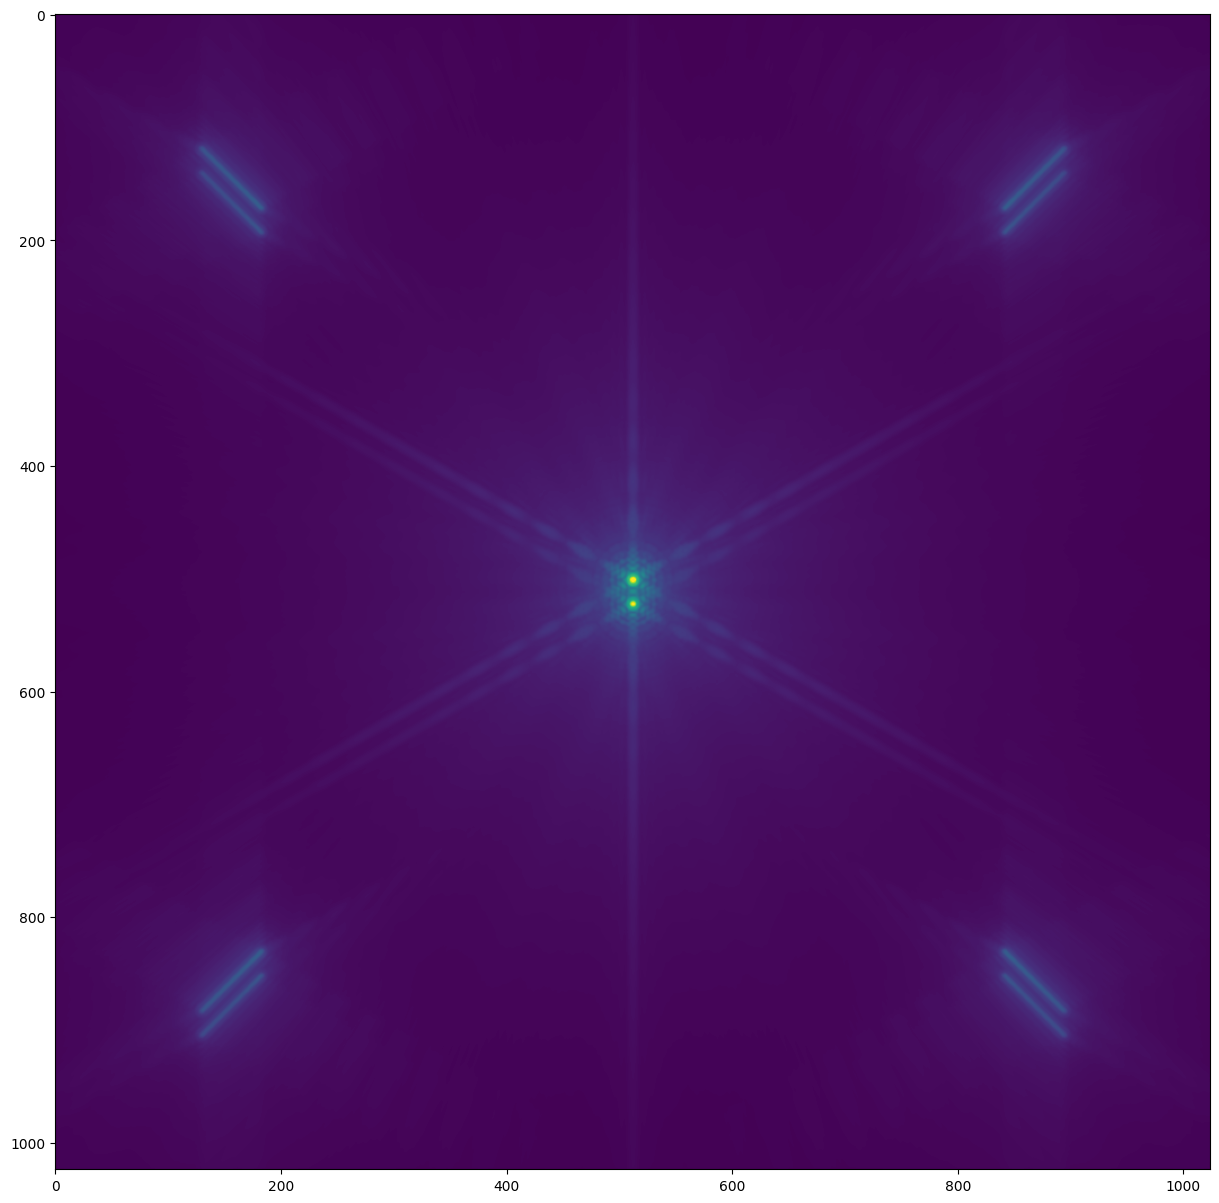

In [10]:
plt.figure(figsize = (15,15))
plt.imshow(psf**0.2)